In [1]:
!unzip '/Users/manaswini/Desktop/NeuroNexus/IRIS FLOWER CLASSIFICATION/IRIS.zip'

Archive:  /Users/manaswini/Desktop/NeuroNexus/IRIS FLOWER CLASSIFICATION/IRIS.zip
  inflating: IRIS.csv                


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('/Users/manaswini/Desktop/NeuroNexus/IRIS FLOWER CLASSIFICATION/IRIS.csv')

Exploratory Data Analysis

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

DATA VISUALIZATION

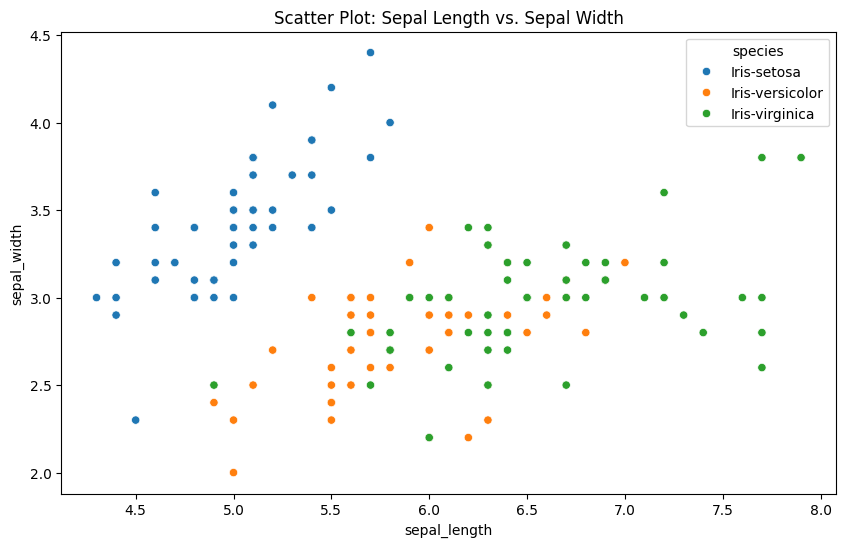

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Scatter Plot: Sepal Length vs. Sepal Width')
plt.show()

<Figure size 1200x800 with 0 Axes>

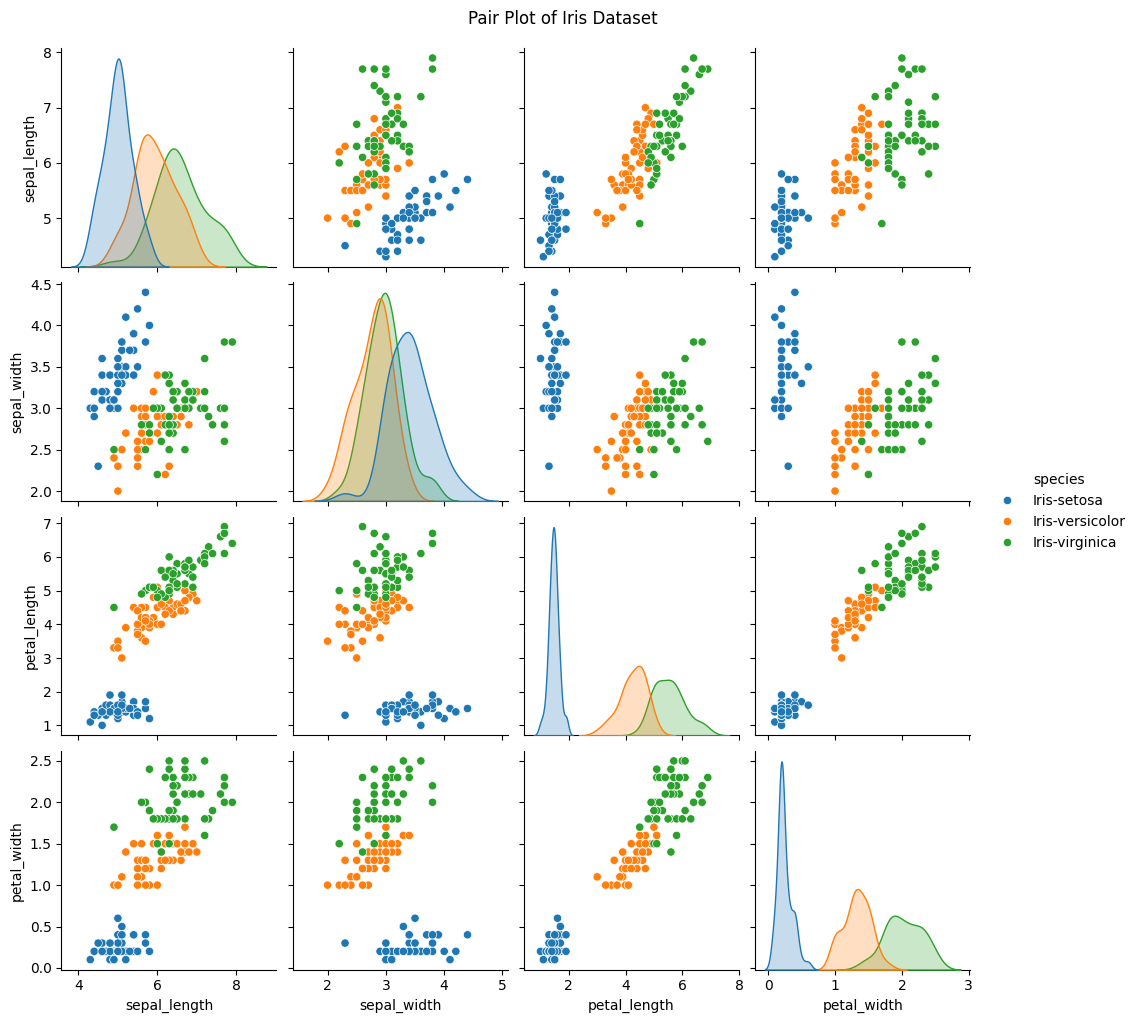

In [11]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

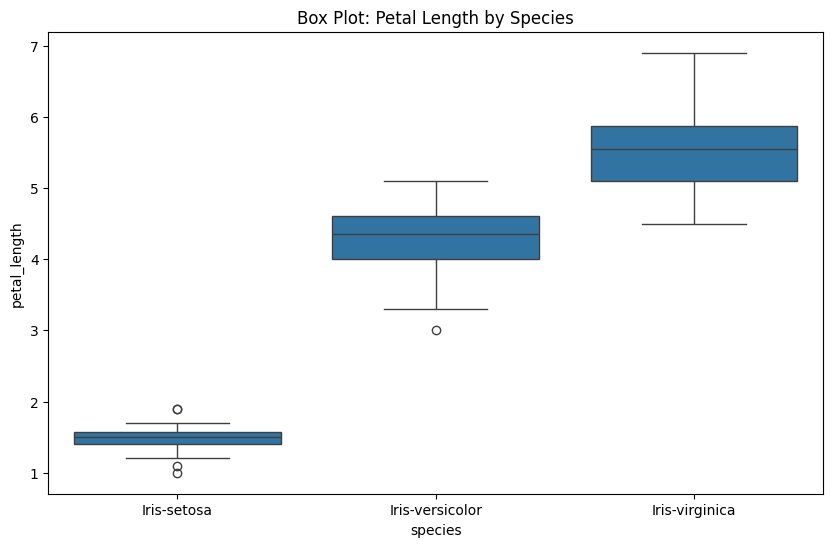

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Box Plot: Petal Length by Species')
plt.show()

In [15]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_df.corr()


Encode the categorical values

In [16]:
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['species'] = df['species'].map(species_mapping)

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Split The Data

In [18]:
X = df.drop('species', axis=1)
y = df['species']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Three MODELS ARE USED FOR PREDICTION AND COMPARATIVE ANALYSIS
They are:-
> Naive Bayes

> Neural Network

> Gradient Boosting Classifier|


In [21]:
nb_classifier = GaussianNB()
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

In [22]:
# Train the classifiers
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [23]:
nn_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [24]:

gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [25]:

y_pred_nb = nb_classifier.predict(X_test)
y_pred_nn = nn_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)

In [26]:
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes:
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [27]:
print("\nNeural Network:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))


Neural Network:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [28]:
print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting:
Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]


In [29]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [30]:
label_encoder.classes_

array([0, 1, 2])

In [31]:
label_encoder.fit(y_train)

LabelEncoder()

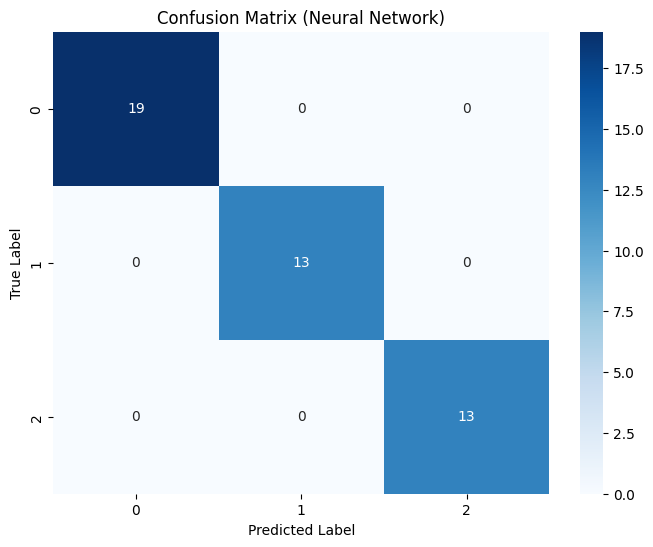

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
cross_val_scores_gb = cross_val_score(gb_classifier, X, y, cv=5)
print("Cross-Validation Scores (Gradient Boosting):", cross_val_scores_gb)

Cross-Validation Scores (Gradient Boosting): [0.96666667 0.96666667 0.9        0.93333333 1.        ]
